Importa as bibliotecas que iremos utilizar

In [ ]:
import pandas as pd
import numpy as np 

# 1 - Anális da Base de Dados

Nesta base de dados temos a rotatividade de clientes em empresas de telecomunicações.

O conjunto de dados inclui informações sobre:

* Clientes que saíram no último mês – a coluna é chamada de cancelou
* Serviços para os quais cada cliente se inscreveu – telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivos, suporte técnico e streaming de TV e filmes
* Informações da conta do cliente – há quanto tempo eles são clientes, contrato, forma de pagamento, cobrança sem papel, cobranças mensais e cobranças totais
* Informações demográficas sobre os clientes – sexo, faixa etária e se eles têm parceiros e dependentes

In [ ]:
# REaliza a leitura da base de dados
df = pd.read_csv('telco.csv')

In [ ]:
# Exibe as duas primeiras linhas
df.head(2)

In [ ]:
# Exibe quantidade de valores nulos por coluna
df.isnull().sum()

In [ ]:
# Exibe o tipo de dados das colunas
df.dtypes

In [ ]:
# Exibe informações descritivas a respeito das colunas numéricas
df.describe().T

In [ ]:
# Exibe informações descritivas a respeito das colunas não numéricas
df.describe(include='O').T

Analisando as informações a cima, nas colunas não numéricas, apenas a coluna id_cliente possui vários valores únicos, tendo as outras colunas no máximo 4 valores únicos.

A coluna id_cliente é um identificador único para cada cliente e em nada agrega para um modelo de machine learning. Sabendo disto, devemos excluir esta coluna.

A coluna genero deve possuir masculino e feminino.

Das outras colunas não numéricas que possuem apenas 2 valores únicos, podemos inferir que são "nao" e "sim", logo, podemos converter tais valores para 0 e 1, respectivamente.

As colunas servico_de_internet, contrato e forma_de_pagamento não aparentam seguir um padrão numérico nos valores únicos, então podemos usar o label encoder para converter os valores textuais para numéricos.

# 2 - Preparar a Base de Dados

In [ ]:
# Apaga a coluna id_cliente
df.drop('id_cliente', inplace=True, axis=1)

## 2.1 - Converter Dados textuais para numéricos com `loc`

In [ ]:
# Exibe os valores únicos da coluna genero
df.genero.unique()

In [ ]:
# Converte os valores da coluna genero de masculino para 0
df.loc[df['genero'] == 'masculino','genero'] = 0
# Converte os valores da coluna genero de feminino para 1
df.loc[df['genero'] == 'feminino','genero'] = 1
# Converte a coluna genero para o tipo de dados numérico
df['genero'] = pd.to_numeric(df['genero'])

df.loc[df['idoso'] == 'nao','idoso'] = 0
df.loc[df['idoso'] == 'sim','idoso'] = 1
df['idoso'] = pd.to_numeric(df['idoso'])

df.loc[df['casado'] == 'nao','casado'] = 0
df.loc[df['casado'] == 'sim','casado'] = 1
df['casado'] = pd.to_numeric(df['casado'])

df.loc[df['dependentes'] == 'nao','dependentes'] = 0
df.loc[df['dependentes'] == 'sim','dependentes'] = 1
df['dependentes'] = pd.to_numeric(df['dependentes'])

df.loc[df['servico_de_telefone'] == 'nao','servico_de_telefone'] = 0
df.loc[df['servico_de_telefone'] == 'sim','servico_de_telefone'] = 1
df['servico_de_telefone'] = pd.to_numeric(df['servico_de_telefone'])

df.loc[df['varias_linhas'] == 'nao','varias_linhas'] = 0
df.loc[df['varias_linhas'] == 'sim','varias_linhas'] = 1
df['varias_linhas'] = pd.to_numeric(df['varias_linhas'])

df.loc[df['seguranca_online'] == 'nao','seguranca_online'] = 0
df.loc[df['seguranca_online'] == 'sim','seguranca_online'] = 1
df['seguranca_online'] = pd.to_numeric(df['seguranca_online'])

df.loc[df['backup_online'] == 'nao','backup_online'] = 0
df.loc[df['backup_online'] == 'sim','backup_online'] = 1
df['backup_online'] = pd.to_numeric(df['backup_online'])

df.loc[df['protecao_de_dispositivo'] == 'nao','protecao_de_dispositivo'] = 0
df.loc[df['protecao_de_dispositivo'] == 'sim','protecao_de_dispositivo'] = 1
df['protecao_de_dispositivo'] = pd.to_numeric(df['protecao_de_dispositivo'])

df.loc[df['suporte_tecnico'] == 'nao','suporte_tecnico'] = 0
df.loc[df['suporte_tecnico'] == 'sim','suporte_tecnico'] = 1
df['suporte_tecnico'] = pd.to_numeric(df['suporte_tecnico'])

df.loc[df['tv'] == 'nao','tv'] = 0
df.loc[df['tv'] == 'sim','tv'] = 1
df['tv'] = pd.to_numeric(df['tv'])

df.loc[df['streaming_de_filmes'] == 'nao','streaming_de_filmes'] = 0
df.loc[df['streaming_de_filmes'] == 'sim','streaming_de_filmes'] = 1
df['streaming_de_filmes'] = pd.to_numeric(df['streaming_de_filmes'])

df.loc[df['fatura_sem_papel'] == 'nao','fatura_sem_papel'] = 0
df.loc[df['fatura_sem_papel'] == 'sim','fatura_sem_papel'] = 1
df['fatura_sem_papel'] = pd.to_numeric(df['fatura_sem_papel'])

df.loc[df['cancelou'] == 'nao','cancelou'] = 0
df.loc[df['cancelou'] == 'sim','cancelou'] = 1
df['cancelou'] = pd.to_numeric(df['cancelou'])

In [ ]:
# Exibe o tipo de dados das colunas
df.dtypes

## 2.2 - Converter Dados textuais para numéricos com `Label Encoder`
Analisando o código a cima, temos apenas 3 colunas do tipo object. vamos analisar quais os valores únicos de cada uma:

In [ ]:
df.servico_de_internet.unique()

In [ ]:
df.contrato.unique()

In [ ]:
df.forma_de_pagamento.unique()


Como não são valores que podemos substituir por valores numéricos de forma intuitiva, vamos usar o label encoder.

In [ ]:
# Primeiro passo, importar a biblioteca necessária
from sklearn.preprocessing import LabelEncoder

# Chamamos a função LabelEncoder e atribuimos à variável le 
le = LabelEncoder()

In [ ]:
# Se der erro ao executar este comando, 
# será necessaŕio instalar a biblioteca sklearn
# Para isto, tire o comentário da linha abaixo e execute
#!pip install sklearn

### Como saber para quais valores foram alterados os dados textuais?

Com o loc nós sabemos para qual valor numérico foi alterado cada valor textual pois nós mesmos definimos este valor.

Com o Label Encoder esta conversão de valores textuais para numéricos é feita de forma automática. 

Não existe uma forma intuitiva de saber para qual valor numérico os valores textuais foram convertidos... Para isto, executamos 2 blocos de códigos, sendo 1 antes da conversão e 1 depois. Estes blocos de código irão retornar um dataframe informando qual a coluna, qual o valor textual antigo e qual o valor textual novo. 

Estes 2 blocos de código são universais e podemser utilizados em qualquer base de dados chamada df.

In [ ]:
# Cria uma lista que recebe o nome das colunas com valores textuais
lista_coluna_object = list(df.select_dtypes(include=['O']).columns)
# Cria uma lista que irá receber os valores únicos das colunas
lista_valores = []
# Cria uma lista que irá receber as colunas correspondentes à cada valor único
lista_coluna = []
for x in lista_coluna_object:
    lista_valores.extend(list(df[x].unique()))
    for y in range(0,len(list(df[x].unique()))):
        lista_coluna.append(x)

In [ ]:
# Converte todos os valores textuais para numéricos
# Nas colunas emprego e estado_civil
df['servico_de_internet'] = le.fit_transform(df['servico_de_internet'])
df['contrato'] = le.fit_transform(df['contrato'])
df['forma_de_pagamento'] = le.fit_transform(df['forma_de_pagamento'])

In [ ]:
# Cria uma lista que irá receber os novos valores já convertidos
lista_novos_valores = []
for x in lista_coluna_object:
    lista_novos_valores.extend(list(df[x].unique()))

# Cria um dicionário com as colunas, valores antigos e valores novos
dic_valores = {
'coluna':lista_coluna,
'valor_antigo' : lista_valores,
'valor_novo':lista_novos_valores
}

# Cria um DataFrame com o dic_valores
df_valores_convertidos = pd.DataFrame(dic_valores)
df_valores_convertidos

In [ ]:
lista_novos_valores

In [ ]:
# Todas colunas com valores numéricos 
df.dtypes

# 3 - Normalizar a base de dados
Não podemos equecer de não normalizar a coluna da nossa classe alvo

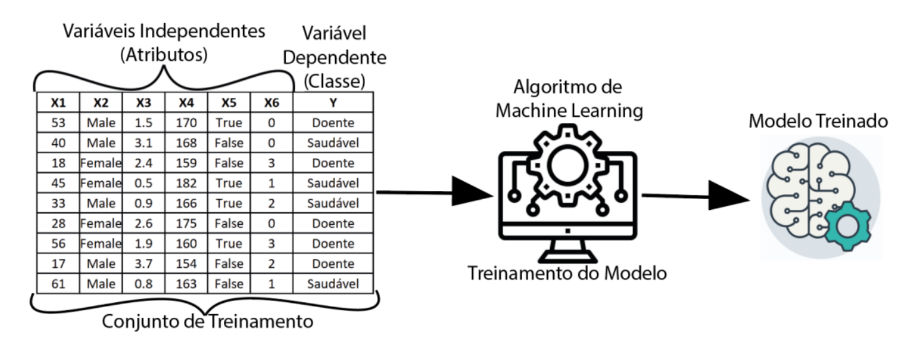

In [ ]:
# Realiza a normalização de toda a base de dados e atribui à variável df_norm
df_norm = (df - df.min()) / (df.max() - df.min())

# Retornamos os valores da classe alvo para os valores numéricos originais
df_norm[['cancelou']] = df[['cancelou']]

In [ ]:
df_norm.head()

# 4 - Vamos treinar um modelo!!
Para treinar o modelo nós separamos a base de dados em duas partes, `treinamento` e `teste`.

# `Treinamento`
Será utilizado para treinar o modelo

# `Teste`
Será utilizado para Testar se o modelo performa bem em dados que não foram utilizados para treinar

# Como fazemos isto?
Iremos utilizar a biblioteca train_test_split do sklearn, que irá realizar isto automaticamente.

Para isto, precisamos separar os dados em 2 (X e y), sendo X as `variáveis independentes` e y a `variável dependente` (Classe Alvo).

In [ ]:
# Exibe uma lista com as colunas 
list(df_norm.columns)

In [ ]:
# Exibe todas as colunas menos a última
list(df_norm.columns[0:-1])

In [ ]:
# Para selecionar mais de uma coluna nós passamos 
# uma lista com as colunas desejadas
df_norm[['genero', 'idoso', 'casado', 'dependentes']]

Na varável X nós queremos colocar todas as colunas menos a última, então vamos usar o código `list(df_norm.columns[0:-1])` para selecionar todas as colunas menos a última

In [ ]:
# Atribui todas as colunas menos a última à variável X
X = df_norm[list(df_norm.columns[0:-1])]

# Exibe as primeiras linhas de X
X.head()

In [ ]:
# Atribuimos à variável y a nossa classe alvo (que é cancelou ou não)
y = df['cancelou']

# Exibe as primeiras linhas de y
y.head()

A quantidade de dados utilizados para o teste geralmente  fica entre 40% e 20%. Esta porcentagem de dados para testes é definida no parâmetro test_size

In [ ]:
# Importamos a biblioteca necessária para dividir a base de dados
from sklearn.model_selection import train_test_split

# Separamos X e y em treino e teste
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.25)

In [ ]:
train_X.head()

In [ ]:
# Exibe a quantidade de registros que serão utilizados para treinar o modelo
train_X.shape[0]

In [ ]:
test_X.head()

In [ ]:
# Exibe a quantidade de registros que serão utilizados para testar o modelo
test_X.shape[0]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cria uma instância do algorítmo de Regressão Logística
lrmodel = LogisticRegression()

# Treina o modelo com a base de treinamento
lrmodel_treinado = lrmodel.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = lrmodel_treinado.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

Analisando o que fizemos a cima, treinamos um modelo Regressão Logística chamado `lrmodel_treinado` e em seguida utiliamos o modelo treinado para prever, nos dados de teste, se o usuário iria ou não cancelar a assinatura.

# Outros tipos de modelos:
Existem diversos tipos de modelos, alguns muito similares na forma de aplicação, mas podem gerar acurácias melhores ou piores.

Cada bloco de código abaixo é o treinamento e teste de um modelo diferente, sobre a mesma base de dados.

In [ ]:
from sklearn import svm

# Cria uma instância do modelo
clf = svm.SVC()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

In [ ]:
from sklearn.linear_model import SGDClassifier

# Cria uma instância do modelo
clf = SGDClassifier()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

In [ ]:
from sklearn.neighbors import NearestCentroid

# Cria uma instância do modelo
clf = NearestCentroid()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Cria uma instância do modelo
clf = GaussianNB()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

In [ ]:
from sklearn import tree

# Cria uma instância do modelo
clf = tree.DecisionTreeClassifier()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Cria uma instância do modelo
clf = RandomForestClassifier()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Cria uma instância do modelo
clf = ExtraTreesClassifier()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

In [ ]:
from sklearn.neural_network import MLPClassifier

# Cria uma instância do modelo
clf = MLPClassifier()
# Treina o modelo com a base de treinamento
clf.fit(train_X, train_Y)

# Realiza a predição dos valores de teste
pred_Y = clf.predict(test_X)

# Retorna a acurácia de acerto na base de teste
accuracy_score(test_Y, pred_Y)

Analisando as acurácias dos modelos, vemos que ficaram bem próximas, mas em machine learning, maior acurácia significa em melhores resultados.

Aqui, o algorítmo que resultou n melhor acurácia foi o `LogisticRegression`, em português, `Regressão Logística`.

Na prática, poderíamos utilizar este modelo com outros clientes da empresa e prever com nosso modelo quais clientes provavelmente irão cancelar o contrato e, antes que isto ocorra, criar uma campanha de marketing direcionada a estes clientes, ofertando planos mais em conta, mais vantagens... Assim evitando a evasão de clientes.

Na aula que vem iremos aprender como aplicar estes modelos com dados de um ou mais clientes para prever se o cliente irá cancelar ou não o contrato. 

# Exercícios

A base de dados `campanha_banco.csv` possui informaçõs sobre campanhas de marketing de um banco x, oferecendo um determinado produto aos clientes (como por exemplo, seguro de pix, seguro de vida, empréstimo, proposta de invertimento em fundo de investimentos...)

Infelizmente, por questões de sigilo de dados, o banco não pode informar qual o tipo de campanha e 8 colunas possuem valores mas não possuem a descrição do que a coluna representa. 

A base de dados já teve os dados textuais convertidos para numéricos. 

1 - Realize a leitura da base de dados;

2 - Realize uma breve análise da base de dados;

3 - Realize a normalização da base de dados (Sem normalizar a classe alvo, que é a última coluna `aceitou_proposta`);

4 - Crie a variável X (Para receber os dados de todas as colunas menos a última);

5 - Crie a variável y para receber os dados da coluna `aceitou_proposta`;

6 - Use o train_test_split para separar a base de dados em treinamento e teste (separe 30% dos dados para teste);

7 - Aplique a base de treinamento em no mínimo 4 modelos;

8 - Verifique qual modelo resultou na melhor acurácia.